In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.models import Model

In [2]:
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data() #carregamento base de dados

x_train, x_test = x_train / 255.0, x_test / 255.0 #normaliznado em 0 até 1
y_train, y_test = y_train.flatten(), y_test.flatten() #deixando em um vetor

print(x_train.shape,  y_train.shape)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
(50000, 32, 32, 3) (50000,)


Quantas classes tem dentro do dataSet

In [3]:
K = len(set(y_train))
K

10

In [4]:
i = Input(shape=x_train[0].shape) #camada de entrada

x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(i) #primeira convolução
x = BatchNormalization()(x)#normalizar os dados

x = Conv2D(32, (3, 3), strides=2, activation='relu', padding='same')(x)
x = BatchNormalization()(x)#normalizar os dados
x = MaxPooling2D(2,2)(x) #diminuir dimensão da imagem

x = Conv2D(64, (3, 3),  activation='relu', padding='same')(x) #segunda
x = BatchNormalization()(x) #normalizar os dados

x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x)#normalizar os dados
x = MaxPooling2D(2,2)(x) #diminuir dimensão da imagem

x = Conv2D(128, (3, 3),  activation='relu', padding='same')(x) #terceira
x = BatchNormalization()(x) #normalizar os dados

x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
x = BatchNormalization()(x) #normalizar os dados
x = MaxPooling2D(2,2)(x) #diminuir dimensão da imagem



x = Flatten()(x) #deixando em apenas um vetor para a camada densa

x = Dropout(0.2)(x) #dropout para evitar overffiting
x = Dense(1024, activation='relu')(x) #camadad densa
x = Dropout(0.2)(x) #denovo, evitando overfitting

x = Dense(K, activation='softmax')(x) #camada de saída

model = Model(i, x)

Compilação e treinamento da rede neural

In [5]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs = 5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 73s 43ms/step - accuracy: 0.3807 - loss: 1.7100 - val_accuracy: 0.3943 - val_loss: 2.0175
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.5669 - loss: 1.2197 - val_accuracy: 0.6037 - val_loss: 1.1239
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 40ms/step - accuracy: 0.6329 - loss: 1.0372 - val_accuracy: 0.6137 - val_loss: 1.1238
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.6820 - loss: 0.9102 - val_accuracy: 0.6516 - val_loss: 0.9887
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 39ms/step - accuracy: 0.7126 - loss: 0.8284 - val_accuracy: 0.6602 - val_loss: 0.9953


Utilização do Data Augmentation para gerar novas imagens com bases nas imagens já existentes

In [6]:
batch_size = 32

data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    width_shift_range=0.1,      # Desloca a imagem horizontalmente em até 10%
    height_shift_range=0.1,     # Desloca a imagem verticalmente em até 10%
    horizontal_flip=True        # Gira horizontalmente (espelhamento)
)

# Cria o gerador com os dados de treino reais, aplicando as transformações acima
train_generator = data_generator.flow(x_train, y_train, batch_size)

steps_per_epoch = x_train.shape[0] // batch_size  # Total de imagens dividido pelo tamanho do lote

# Treina o modelo usando o gerador com data augmentation
r = model.fit(
    train_generator,                  # Dados com aumento
    validation_data=(x_test, y_test), # Validação sem aumento
    epochs=5
)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.6483 - loss: 1.0098 - val_accuracy: 0.6441 - val_loss: 1.0151
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 86s 55ms/step - accuracy: 0.6676 - loss: 0.9458 - val_accuracy: 0.6380 - val_loss: 1.1199
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 54ms/step - accuracy: 0.6828 - loss: 0.9110 - val_accuracy: 0.6122 - val_loss: 1.1609
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 54ms/step - accuracy: 0.6845 - loss: 0.9010 - val_accuracy: 0.7097 - val_loss: 0.8525
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 57ms/step - accuracy: 0.6975 - loss: 0.8686 - val_accuracy: 0.7037 - val_loss: 0.8506


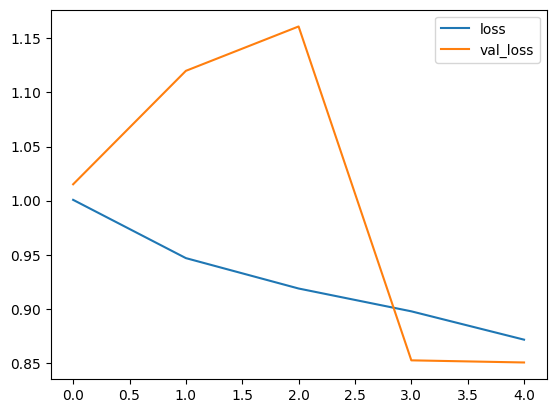

In [7]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

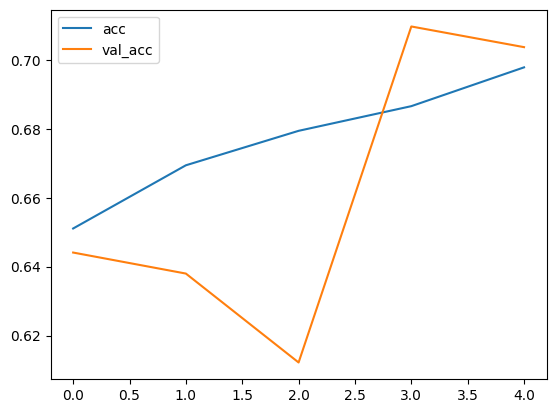

In [8]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step
confusion matrix, without normalization
[[758  25  17  18  23   6  12  13  51  77]
 [ 11 814   1   2   2   1   9   6  22 132]
 [ 74  12 522  28 123  68  96  43  16  18]
 [ 19  14  48 337 116 195 155  75  20  21]
 [ 33   6  30  12 659  20  99 129   8   4]
 [  7   7  45  95  64 571  80 107  11  13]
 [  8   7  21  12  31  15 875  15   8   8]
 [ 17   6  24  19  38  28  24 824   1  19]
 [ 48  45   7   4  11   2   8   4 820  51]
 [ 21  51   4   7   3   3  10  24  20 857]]


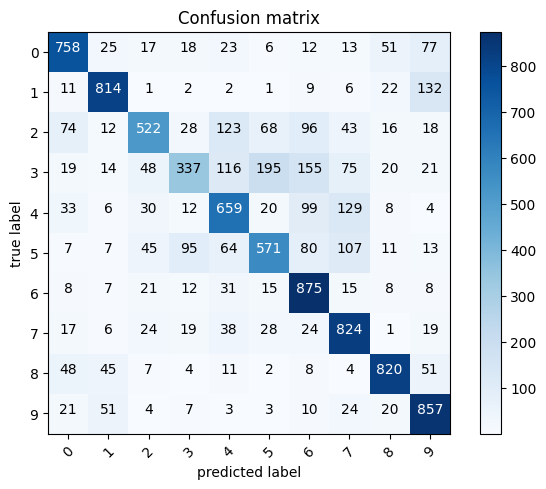

In [9]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,             # Se True, normaliza os valores
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    # Normaliza os valores da matriz (percentuais por linha)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("normalized confusion matrix")
    else:
        print('confusion matrix, without normalization')

    print(cm)

    # Exibe a matriz como uma imagem colorida
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    # Define os rótulos dos eixos
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    # Define o formato dos números exibidos na matriz (decimais se normalizado)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.

    # Insere os números dentro da matriz
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    # Ajustes finais
    plt.tight_layout()
    plt.ylabel('true label')        # Eixo Y
    plt.xlabel('predicted label')   # Eixo X
    plt.show()

# Faz a previsão no conjunto de teste e pega a classe com maior probabilidade
p_test = model.predict(x_test).argmax(axis=1)

# Cria a matriz de confusão comparando os rótulos reais com os previstos
cm = confusion_matrix(y_test, p_test)

# Plota a matriz com rótulos de 0 a 9
plot_confusion_matrix(cm, list(range(10)))

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 16, 16, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 32)       │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 8, 8, 32)       │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 4, 4, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 2, 2, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 2, 2, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 2, 2, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       132,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,291,648 (4.93 MB)

 Trainable params: 430,250 (1.64 MB)

 Non-trainable params: 896 (3.50 KB)

 Optimizer params: 860,502 (3.28 MB)

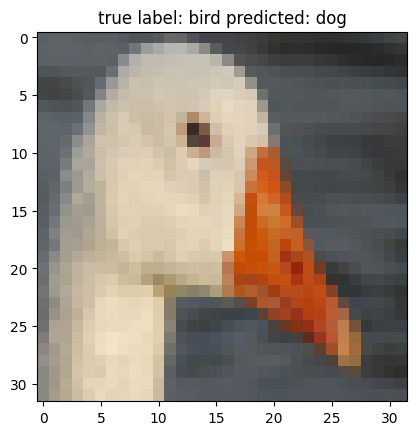

In [10]:
# Define os rótulos das classes do conjunto de dados
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

# Encontra os índices das previsões incorretas
misclassified_idx = np.where(p_test != y_test)[0]

# Seleciona aleatoriamente uma amostra entre as classificações erradas
i = np.random.choice(misclassified_idx)

# Exibe a imagem da amostra escolhida, em escala de cinza
plt.imshow(x_test[i], cmap='gray')

# Mostra no título o rótulo verdadeiro e o rótulo previsto pelo modelo
plt.title("true label: %s predicted: %s" % (labels[y_test[i]], labels[p_test[i]]))

# Exibe o resumo da arquitetura do modelo treinado
model.summary()